# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.transform
import skimage.io
import skimage
from util import utils

## Loading the image

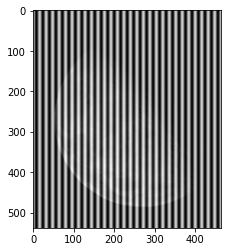

In [2]:
image = utils.read_im(utils.image_input_dir.joinpath("noisy_moon.png"))
plt.imshow(image, cmap="gray")

In [3]:
def plot_process(image, fft, kernel, filtered_fft, filtered_image):
    rows, cols, size, cmap = 1, 5, 4, "gray"
    plt.figure(figsize=(cols*size, rows*size))
    
    # Show original Image
    plt.subplot(rows, cols, 1)
    plt.imshow(image, cmap=cmap)
    # Visualize FFT
    plt.subplot(rows, cols, 2) 
    plt.imshow(utils.fft_to_image(fft), cmap=cmap)
    # Visualize FFT kernel
    plt.subplot(rows, cols, 3)
    plt.imshow(utils.fft_to_image(kernel), cmap=cmap)
    # Visualize filtered FFT image
    plt.subplot(rows, cols, 4)
    plt.imshow(utils.fft_to_image(filtered_fft), cmap=cmap)
    # Visualize filtered spatial image
    plt.subplot(rows, cols, 5)
    plt.imshow(filtered_image, cmap=cmap)
    
    plt.tight_layout()
    plt.savefig(utils.image_output_dir.joinpath("task4c-process.png"))

# Task 4c
Use what you’ve learned from the lectures and the recommended resources to remove the noise in the image. Note that the noise is a periodic signal.


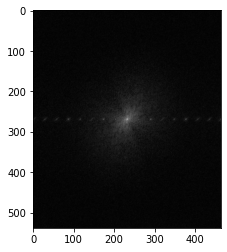

In [4]:
fft = np.fft.fft2(image)
utils.save_im("task4c-fft.png", utils.fft_to_image(fft))
plt.imshow(utils.fft_to_image(fft), cmap="gray")

In [5]:
w, h = image.shape
# Create a "Mask" to remove the white dots 
mask = np.ones([w, h])

# Manually remove pixels/dots along the center horizontal (numbers found by trial and error)
# Single pixel close to center
mask[269,203] = 0
mask[269,261] = 0
# Another small smudge
mask[267:272,172:177] = 0
mask[267:272,288:293] = 0
# Remove at interval
for i in range(0, 6):
    space = 29
    x_s, x_e = 140 - (i*space), 150-(i*space)
    mask[264:275,x_s:x_e] = 0
    x_s, x_e = 315 + (i*space), 325+(i*space)
    mask[264:275,x_s:x_e] = 0
mask[264:275,0:10] = 0

mask = np.fft.fftshift(mask)
# Create filtered FFT
filtered_fft = fft * mask
utils.save_im("task4c-filtered-fft.png", utils.fft_to_image(filtered_fft))

# Create filtered spatial image (inverse FFT)
filtered_image = np.fft.ifft2(filtered_fft).real
filtered_image = utils.normalize(filtered_image)

## Save and show result

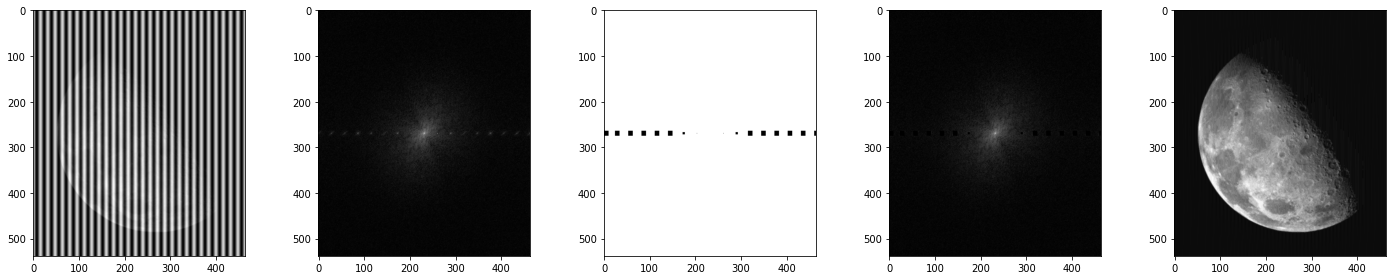

In [6]:
plot_process(image, fft, mask, filtered_fft, filtered_image)
utils.save_im(f"task4c-moon-filtered.png", filtered_image)